In [5]:
# Columnas que no aportan valor predictivo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/Customer-Churn-Records.csv')

columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_clean = df.drop(columns=columns_to_drop)


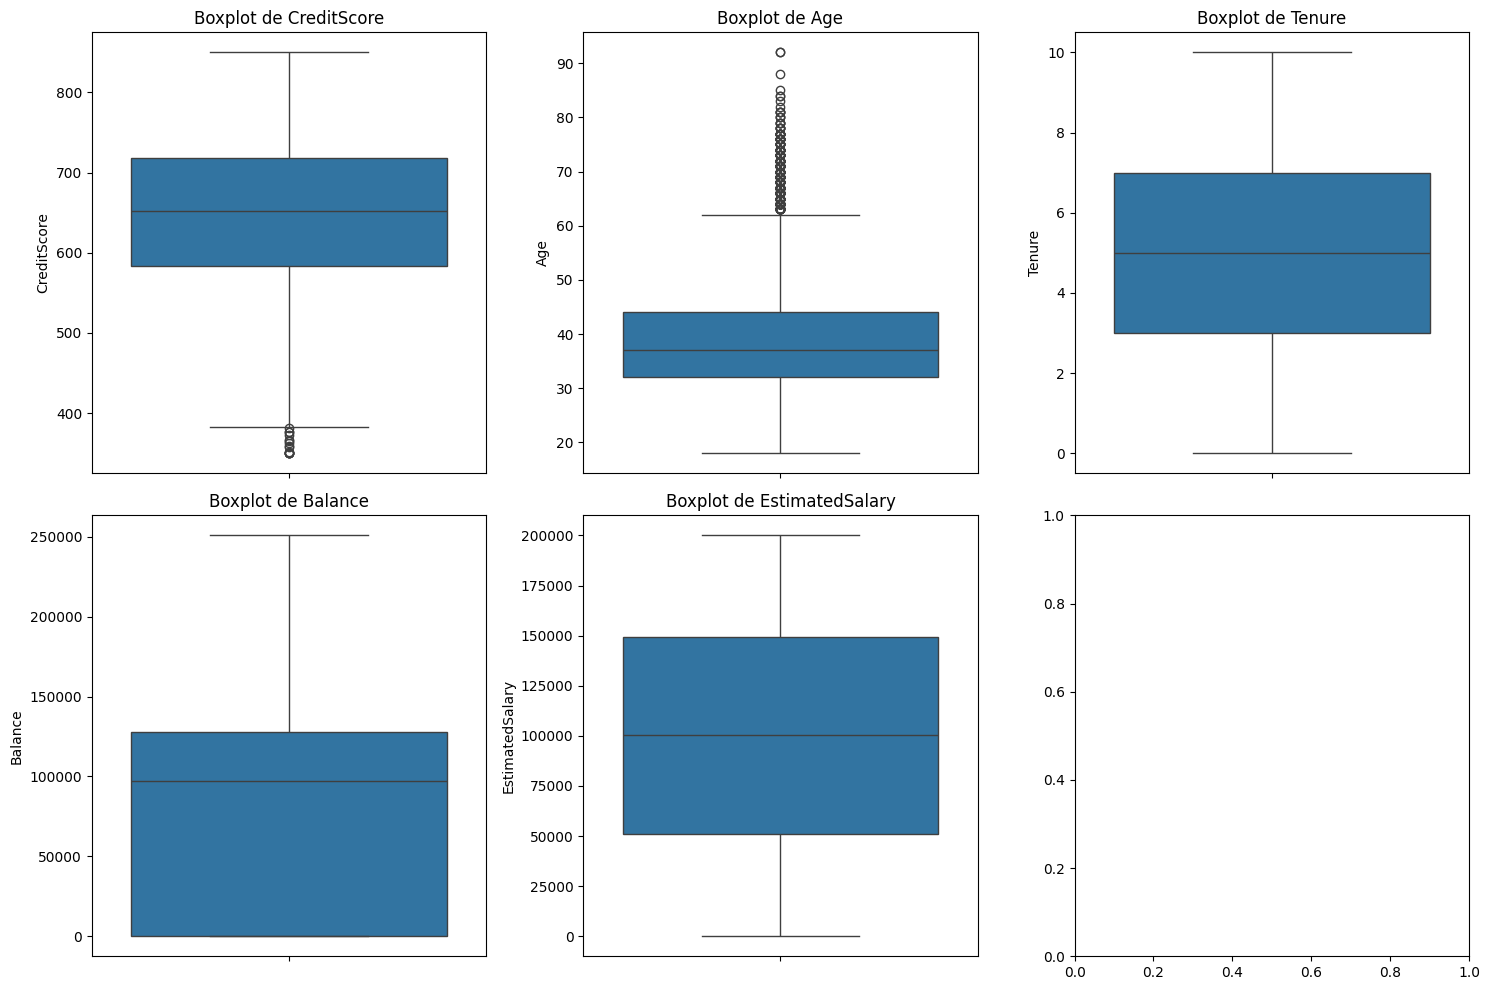

In [6]:
# Boxplots para detectar outliers
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, col in enumerate(numeric_features):
    row = idx // 3
    col_idx = idx % 3
    sns.boxplot(data=df_clean, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.savefig('../reports/figures/outliers_boxplots.png', dpi=300)


In [7]:
# One-hot encoding para Geography
df_clean = pd.get_dummies(df_clean, columns=['Geography'], prefix='Geography', drop_first=True)

# Label encoding para Gender
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female': 0})


In [9]:
# Verificar valores de Card Type
print("Distribución de Card Type:")
print(df_clean['Card Type'].value_counts())
print()

# Opción A: Eliminar si no es relevante
# df_clean = df_clean.drop(columns=['Card Type'])

# Opción B: One-hot encoding (RECOMENDADO)
df_clean = pd.get_dummies(df_clean, columns=['Card Type'], prefix='CardType', drop_first=True)

print(f"Nuevas columnas creadas: {[col for col in df_clean.columns if 'CardType' in col]}")


Distribución de Card Type:
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

Nuevas columnas creadas: ['CardType_GOLD', 'CardType_PLATINUM', 'CardType_SILVER']


In [10]:
df_clean.to_csv('../data/processed/bank_churn_clean.csv', index=False)
print(f"Dataset limpio guardado con {df_clean.shape[0]} registros y {df_clean.shape[1]} columnas")



Dataset limpio guardado con 10000 registros y 18 columnas
